In [1]:
import pandas as pd


data = pd.read_csv('/content/UC-8585-1 dataset.csv')
data.head()


,Company,Sector,Subsector,Market Cap (£ m),Current Price per Share (pence),Net Asset Value per Share (pence),Gearing (%),Dividend Yield (%),Last Statement Year
0,1PM PLC,Financial Services,Specialty Finance,35.91,41.50,22.92,4.49,1.27,2018.0
1,1SPATIAL PLC,Support Services,Business Support Services,34.06,34.50,-0.49,-3.95,NaN,2018.0
2,21ST CENTURY TECHNOLOGY PLC,Support Services,Business Support Services,2.75,2.95,-2.05,348.69,NaN,2017.0
3,3I GROUP PLC,Financial Services,Specialty Finance,7524.93,774.00,720.73,NaN,3.49,2018.0
4,3I INFRASTRUCTURE PLC,Equity Investment Instruments,Equity Investment Instruments,2094.97,258.35,211.02,NaN,3.68,2018.0


In [2]:
# Step 4: Check for missing data in each column
data.isnull().sum()


,0
Company,1
Sector,1
Subsector,1
Market Cap (£ m),1
Current Price per Share (pence),3
Net Asset Value per Share (pence),202
Gearing (%),814
Dividend Yield (%),758
Last Statement Year,49


In [3]:

data['Company'].fillna('Unknown', inplace=True)
data['Sector'].fillna('Unknown', inplace=True)
data['Subsector'].fillna('Unknown', inplace=True)

data['Market Cap (£ m)'].fillna(data['Market Cap (£ m)'].median(), inplace=True)
data['Current Price per Share (pence)'].fillna(data['Current Price per Share (pence)'].median(), inplace=True)
data['Net Asset Value per Share (pence)'].fillna(data['Net Asset Value per Share (pence)'].median(), inplace=True)

data.dropna(subset=['Last Statement Year'], inplace=True)

data.drop(columns=['Gearing (%)', 'Dividend Yield (%)'], inplace=True)

data.isnull().sum()


,0
Company,0
Sector,0
Subsector,0
Market Cap (£ m),0
Current Price per Share (pence),0
Net Asset Value per Share (pence),0
Last Statement Year,0


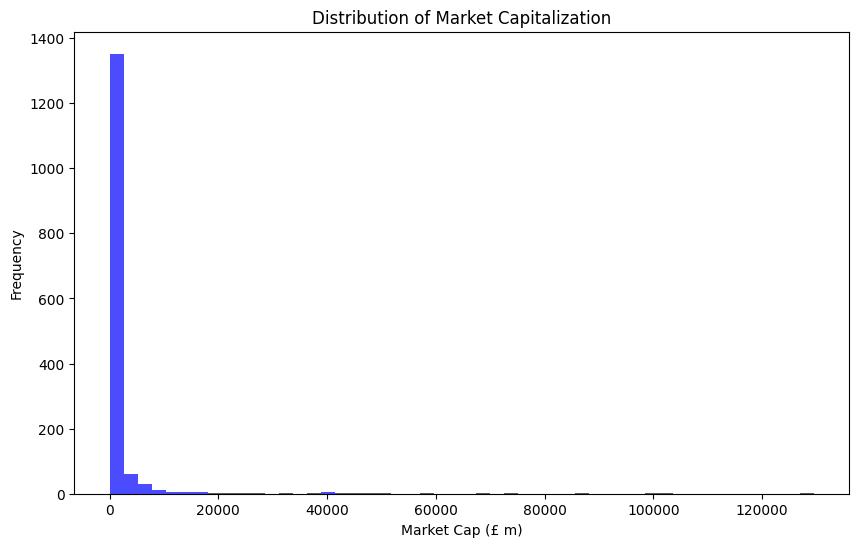

In [4]:
import matplotlib.pyplot as plt

#  Plot the distribution of Market Capitalization
plt.figure(figsize=(10,6))
plt.hist(data['Market Cap (£ m)'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Cap (£ m)')
plt.ylabel('Frequency')
plt.show()


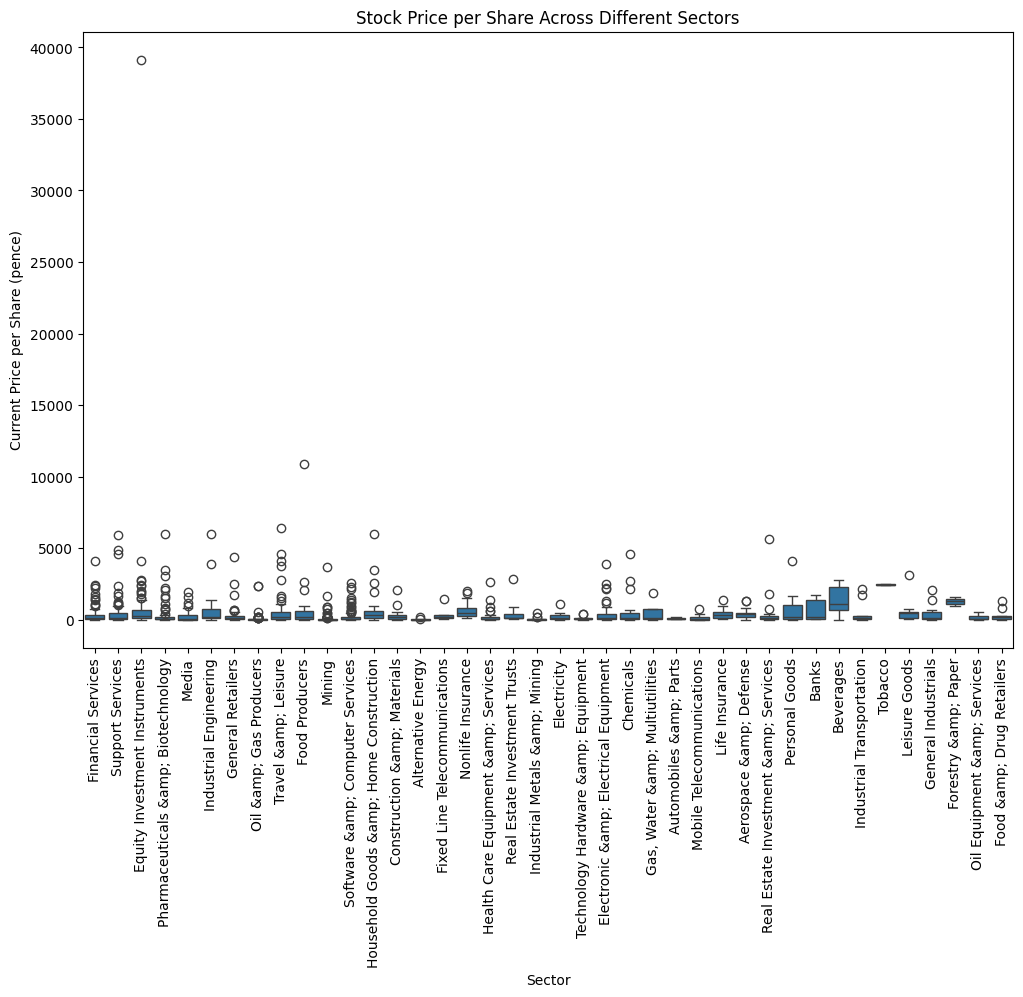

In [5]:
import seaborn as sns

# Step 7: Boxplot of Current Price per Share across different sectors
plt.figure(figsize=(12,8))
sns.boxplot(x='Sector', y='Current Price per Share (pence)', data=data)
plt.xticks(rotation=90)
plt.title('Stock Price per Share Across Different Sectors')
plt.show()


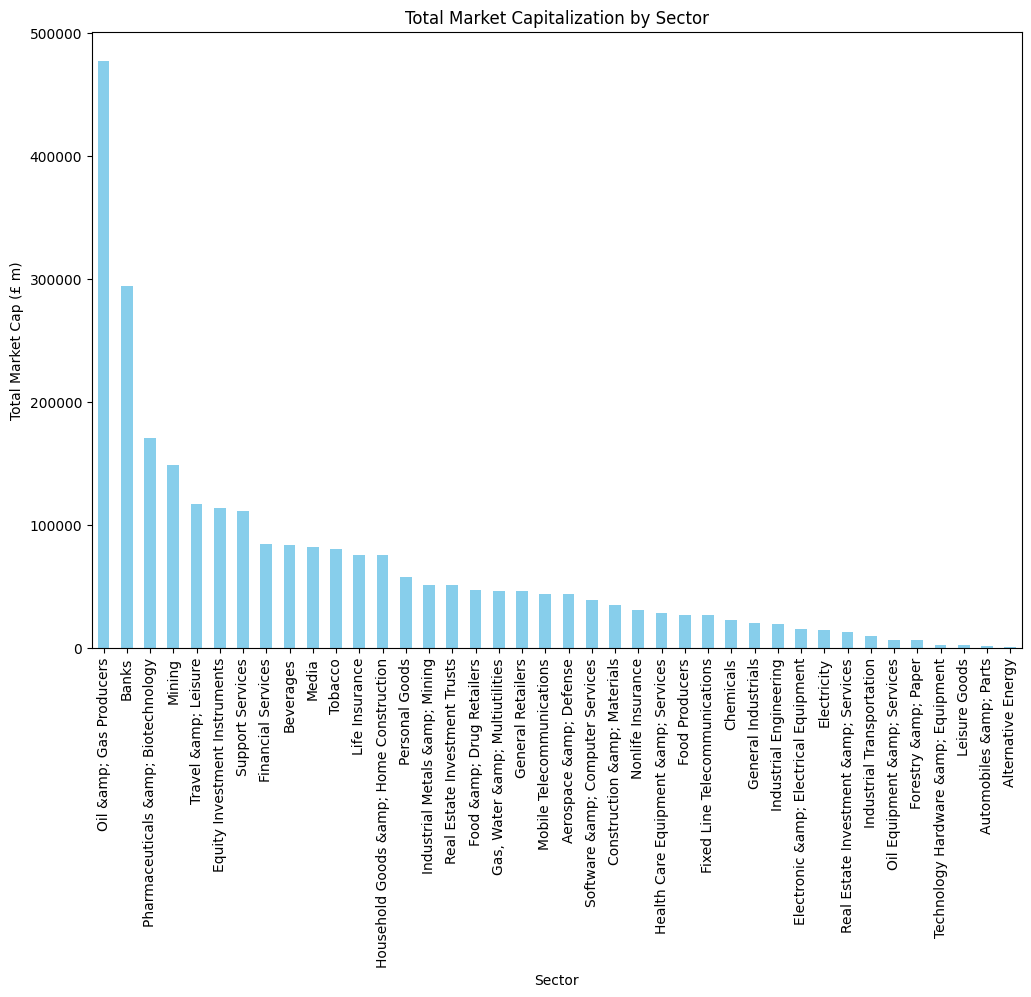

In [7]:
#Total Market Capitalization by Sector
plt.figure(figsize=(12,8))
market_cap_by_sector = data.groupby('Sector')['Market Cap (£ m)'].sum().sort_values(ascending=False)
market_cap_by_sector.plot(kind='bar', color='skyblue')
plt.title('Total Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Market Cap (£ m)')
plt.xticks(rotation=90)
plt.show()


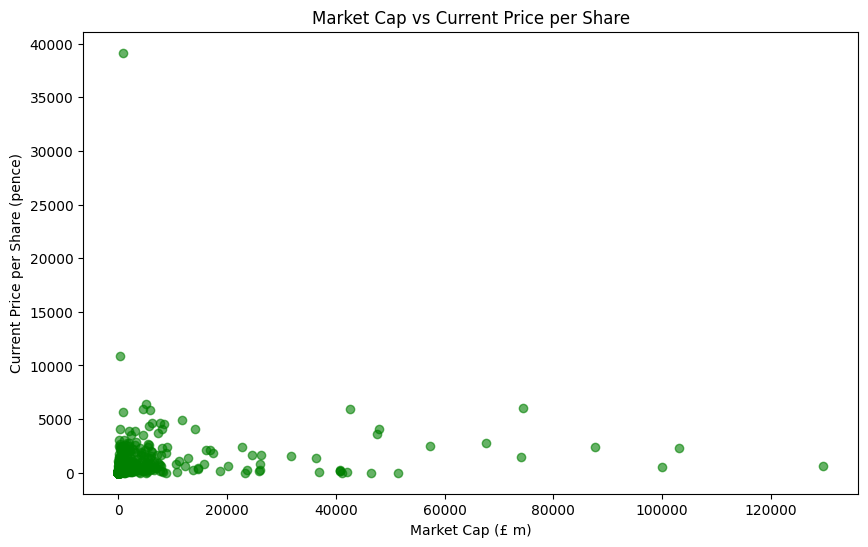

In [10]:
# Scatter plot of Market Cap vs Current Price per Share
plt.figure(figsize=(10,6))
plt.scatter(data['Market Cap (£ m)'], data['Current Price per Share (pence)'], alpha=0.6, color='green')
plt.title('Market Cap vs Current Price per Share')
plt.xlabel('Market Cap (£ m)')
plt.ylabel('Current Price per Share (pence)')
plt.show()


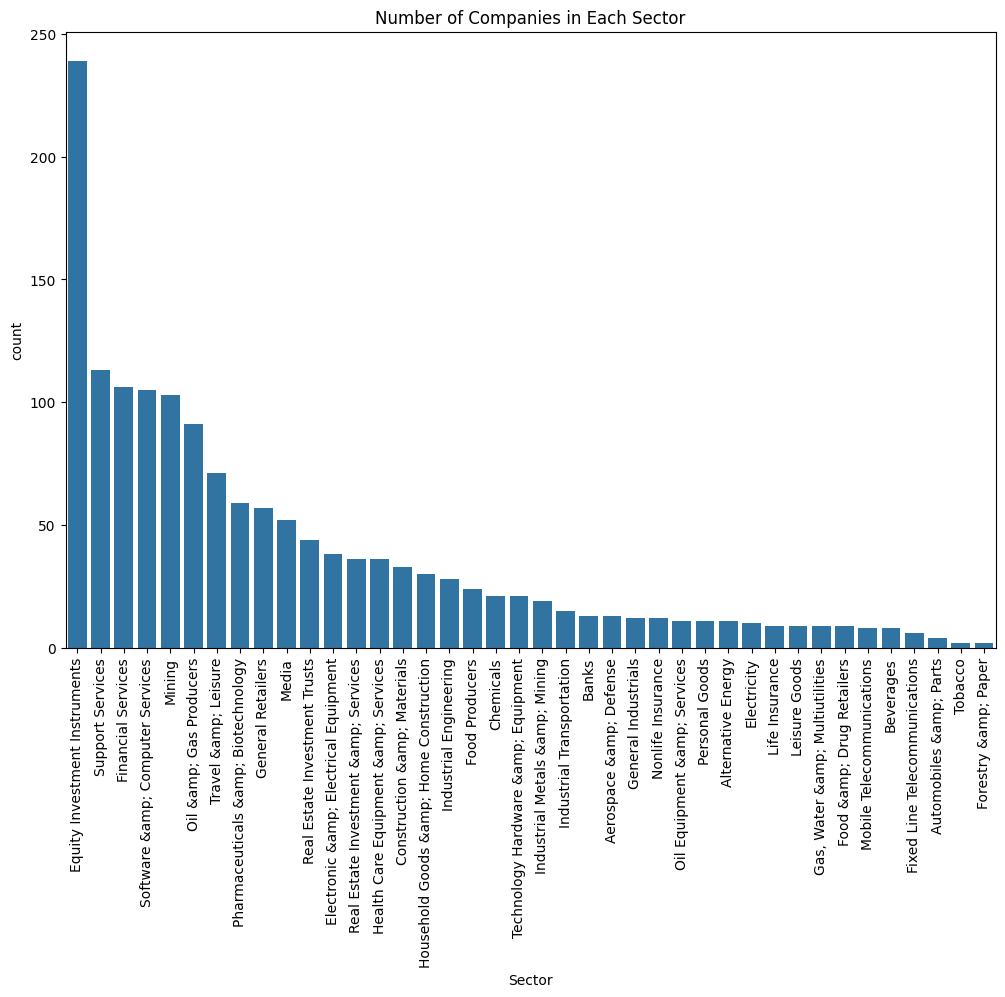

In [11]:
# Count plot of companies in each sector
plt.figure(figsize=(12,8))
sns.countplot(x='Sector', data=data, order=data['Sector'].value_counts().index)
plt.title('Number of Companies in Each Sector')
plt.xticks(rotation=90)
plt.show()


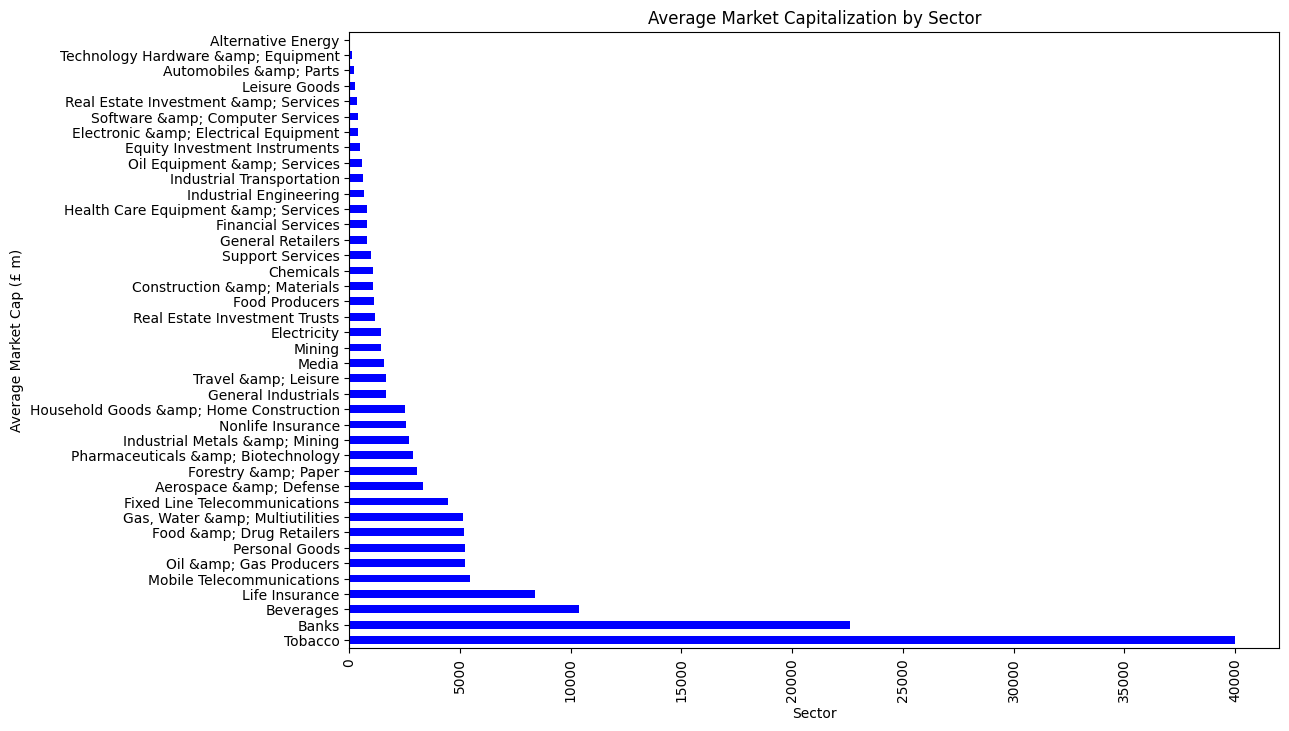

In [14]:
#  Average Market Capitalization by Sector
plt.figure(figsize=(12,8))
avg_market_cap_by_sector = data.groupby('Sector')['Market Cap (£ m)'].mean().sort_values(ascending=False)
avg_market_cap_by_sector.plot(kind='barh', color='blue')
plt.title('Average Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Market Cap (£ m)')
plt.xticks(rotation=90)
plt.show()


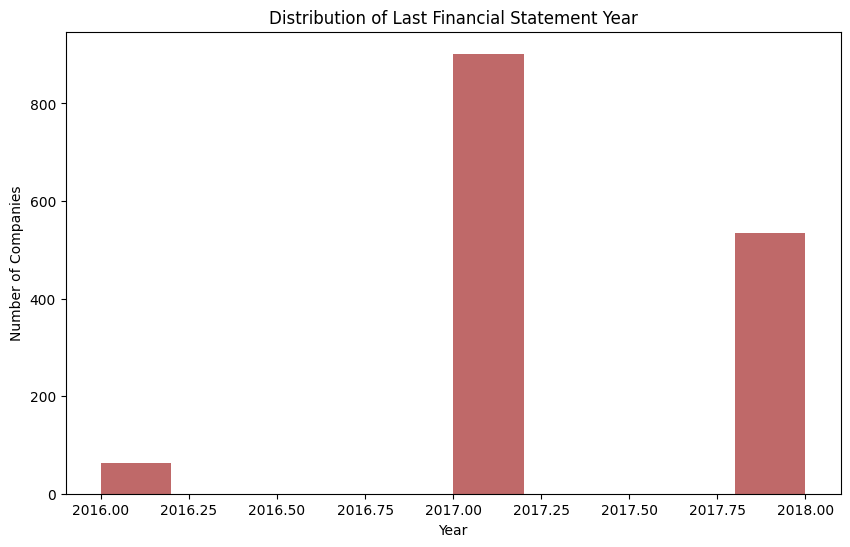

In [16]:
# Distribution of Last Financial Statement Year
plt.figure(figsize=(10,6))
plt.hist(data['Last Statement Year'], bins=10, color='brown', alpha=0.7)
plt.title('Distribution of Last Financial Statement Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.show()


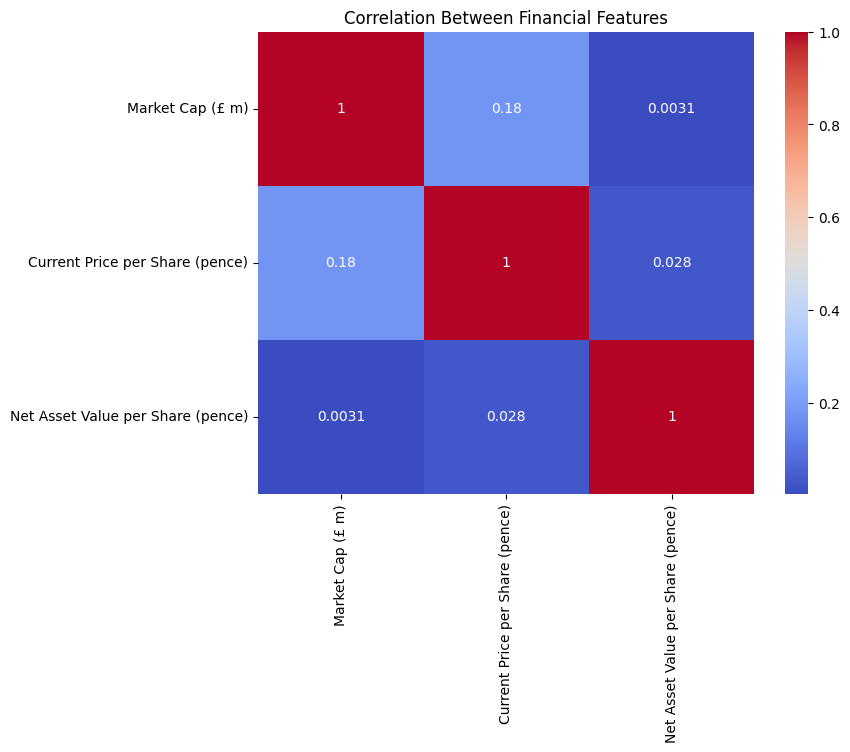

In [6]:
# Step 8: Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(data[['Market Cap (£ m)', 'Current Price per Share (pence)', 'Net Asset Value per Share (pence)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Financial Features')
plt.show()


In [17]:
# One-Hot Encoding for 'Sector' and 'Subsector'
data_encoded = pd.get_dummies(data, columns=['Sector', 'Subsector'], drop_first=True)

# Check the shape and columns after encoding
data_encoded.head()


,Company,Market Cap (£ m),Current Price per Share (pence),Net Asset Value per Share (pence),Last Statement Year,Sector_Alternative Energy,Sector_Automobiles &amp; Parts,Sector_Banks,Sector_Beverages,Sector_Chemicals,...,Subsector_Specialty Finance,Subsector_Specialty REITs,Subsector_Specialty Retailers,Subsector_Telecommunications Equipment,Subsector_Tobacco,Subsector_Toys,Subsector_Transportation Services,Subsector_Travel &amp; Tourism,Subsector_Waste &amp; Disposal Services,Subsector_Water
0,1PM PLC,35.91,41.50,22.92,2018.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1SPATIAL PLC,34.06,34.50,-0.49,2018.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,21ST CENTURY TECHNOLOGY PLC,2.75,2.95,-2.05,2017.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3I GROUP PLC,7524.93,774.00,720.73,2018.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3I INFRASTRUCTURE PLC,2094.97,258.35,211.02,2018.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the numerical columns to scale
numerical_cols = ['Market Cap (£ m)', 'Current Price per Share (pence)', 'Net Asset Value per Share (pence)']

# Apply scaling
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check the data after scaling
data_encoded.head()


,Company,Market Cap (£ m),Current Price per Share (pence),Net Asset Value per Share (pence),Last Statement Year,Sector_Alternative Energy,Sector_Automobiles &amp; Parts,Sector_Banks,Sector_Beverages,Sector_Chemicals,...,Subsector_Specialty Finance,Subsector_Specialty REITs,Subsector_Specialty Retailers,Subsector_Telecommunications Equipment,Subsector_Tobacco,Subsector_Toys,Subsector_Transportation Services,Subsector_Travel &amp; Tourism,Subsector_Waste &amp; Disposal Services,Subsector_Water
0,1PM PLC,0.000276,0.001060,0.697561,2018.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1SPATIAL PLC,0.000262,0.000881,0.697549,2018.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,21ST CENTURY TECHNOLOGY PLC,0.000020,0.000075,0.697549,2017.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3I GROUP PLC,0.058061,0.019770,0.697907,2018.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3I INFRASTRUCTURE PLC,0.016164,0.006598,0.697654,2018.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
from sklearn.model_selection import train_test_split

# Step 21: Define X (features) and y (target)
X = data_encoded.drop('Current Price per Share (pence)', axis=1)  # All features except the target
y = data_encoded['Current Price per Share (pence)']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1200, 142), (300, 142), (1200,), (300,))

In [21]:
# Drop non-numeric column 'Company'
X = data_encoded.drop(['Company', 'Current Price per Share (pence)'], axis=1)  # Drop 'Company' and target variable

# No need to drop 'Current Price per Share' again as we already assigned 'y' as the target
y = data_encoded['Current Price per Share (pence)']

# Now split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes again to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Continue training the model as before
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1842689.5579667895
Mean Squared Error (MSE): 1018651431398157.6
Root Mean Squared Error (RMSE): 31916319.201909196
R-squared (R2): -3.1174217852278185e+18


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


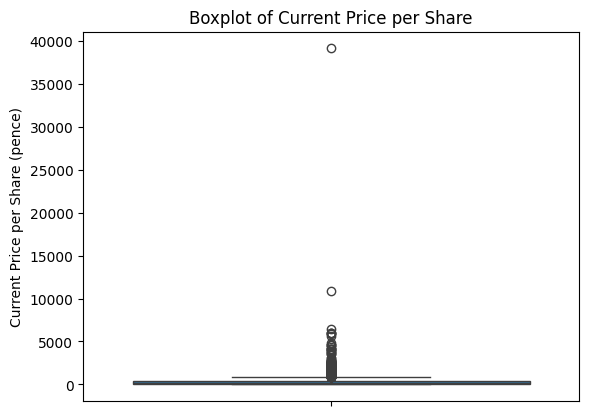

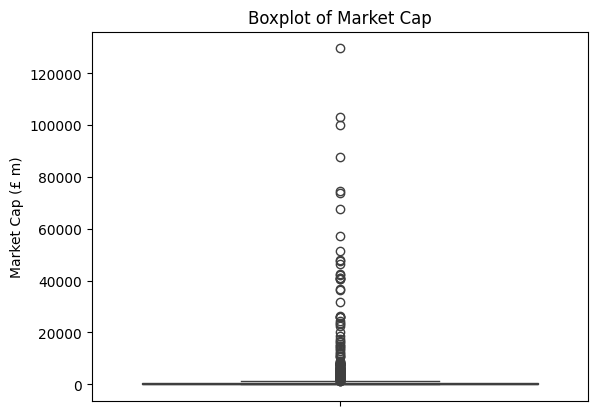

In [22]:
import seaborn as sns

# Plot distributions
sns.boxplot(data['Current Price per Share (pence)'])
plt.title('Boxplot of Current Price per Share')
plt.show()

sns.boxplot(data['Market Cap (£ m)'])
plt.title('Boxplot of Market Cap')
plt.show()

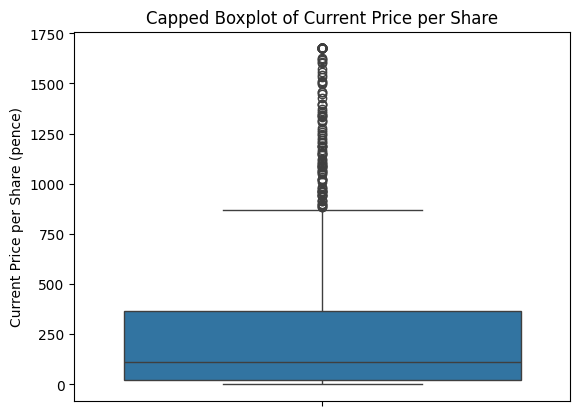

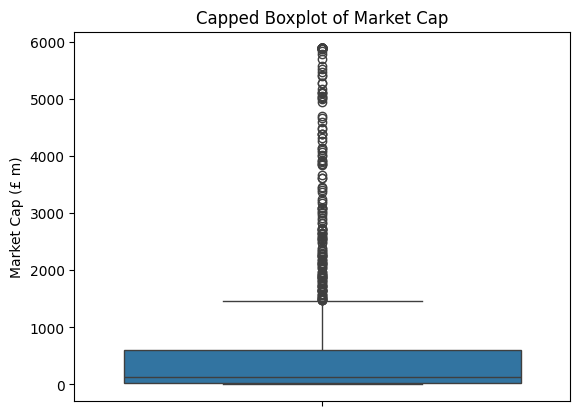

In [24]:
# Set the upper limit to the 95th percentile
import numpy as np

# Calculate the 95th percentile for 'Current Price per Share' and 'Market Cap'
cap_price = data['Current Price per Share (pence)'].quantile(0.95)
cap_market_cap = data['Market Cap (£ m)'].quantile(0.95)

# Apply the capping
data['Current Price per Share (pence)'] = np.where(data['Current Price per Share (pence)'] > cap_price, cap_price, data['Current Price per Share (pence)'])
data['Market Cap (£ m)'] = np.where(data['Market Cap (£ m)'] > cap_market_cap, cap_market_cap, data['Market Cap (£ m)'])

# Re-check boxplots after capping
sns.boxplot(data['Current Price per Share (pence)'])
plt.title('Capped Boxplot of Current Price per Share')
plt.show()

sns.boxplot(data['Market Cap (£ m)'])
plt.title('Capped Boxplot of Market Cap')
plt.show()


In [25]:
# Step 28: Remove outliers in Current Price per Share and Market Cap
cap_price = data['Current Price per Share (pence)'].quantile(0.95)
cap_market_cap = data['Market Cap (£ m)'].quantile(0.95)

# Filter out the outliers
data_clean = data[(data['Current Price per Share (pence)'] <= cap_price) & (data['Market Cap (£ m)'] <= cap_market_cap)]

# Check the new shape of the dataset
print("New shape after removing outliers:", data_clean.shape)



New shape after removing outliers: (1374, 7)


In [27]:
# Ensure that 'Sector' and 'Subsector' are properly encoded
data_encoded = pd.get_dummies(data_clean, columns=['Sector', 'Subsector'], drop_first=True)

# Drop the 'Company' column as it's not relevant for numeric model input
X = data_encoded.drop(['Company', 'Current Price per Share (pence)'], axis=1)

# The target variable with log transformation
y_log = np.log1p(data_encoded['Current Price per Share (pence)'])

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the model again
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Reverse log transformation to get original scale predictions
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

# Evaluate the model on the original scale
mae = mean_absolute_error(y_test_exp, y_pred_exp)
mse = mean_squared_error(y_test_exp, y_pred_exp)
rmse = mean_squared_error(y_test_exp, y_pred_exp, squared=False)
r2 = r2_score(y_test_exp, y_pred_exp)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 188.30536766915054
Mean Squared Error (MSE): 129734.88087670143
Root Mean Squared Error (RMSE): 360.1872858343301
R-squared (R2): -0.07929761137717994


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Use only 'Current Price per Share (pence)' as the target variable for now
data_prices = data_clean[['Current Price per Share (pence)']]

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_prices)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences with a lookback window of 60 days
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% training data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 2: Build the LSTM model
model = Sequential()

# Add the first LSTM layer with dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense layer for output
model.add(Dense(units=1))  # Single output, predicting the next price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0419
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0338
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0342
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0359
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0346
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0351
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0358
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0332
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0376
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0371
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0365
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0342
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0368
Epoch 14/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0368
Epoch 15/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0329
Epoch 16/20
33/

In [30]:
#Make predictions and evaluate
y_pred = model.predict(X_test)

# Inverse transform to get actual prices
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate performance metrics
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Root Mean Squared Error (RMSE): 325.9852750232419


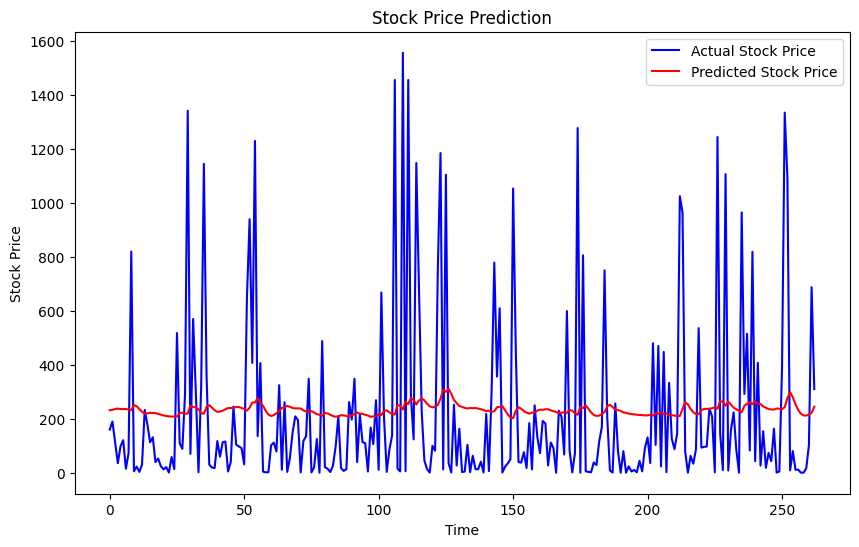

In [31]:
import matplotlib.pyplot as plt

# Step 5: Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, color='blue', label='Actual Stock Price')
plt.plot(y_pred_inv, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [32]:
# Example of changing hyperparameters
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train with more epochs
model.fit(X_train, y_train, epochs=50, batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0417
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0351
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - loss: 0.0374
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0362
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 0.0359
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - loss: 0.0325
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0377
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0375
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - loss: 0.0360
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0325
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0335
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 0.0375
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0402
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0363
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - l

In [33]:
# Example of experimenting with a different window size (e.g., 30 days)
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)


In [34]:
from keras.layers import GRU

# Example of using GRU instead of LSTM
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [35]:
from keras.callbacks import EarlyStopping

# Implement early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - loss: 0.0395 - val_loss: 0.0437
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - loss: 0.0350 - val_loss: 0.0431
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 0.0344 - val_loss: 0.0428
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 0.0376 - val_loss: 0.0427
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - loss: 0.0360 - val_loss: 0.0428
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - loss: 0.0331 - val_loss: 0.0428
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - loss: 0.0326 - val_loss: 0.0427
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.0358 - val_loss: 0.0428
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0340 - val_loss: 0.0431
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0363 - val_loss: 0.0428
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 0.0354 - val_loss: 0.0429
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Absolute Error (MAE): {mae}")

# Coefficient of Determination (R²)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 232.72235877903697
R-squared (R²): 0.0026951444799769853


In [43]:
from sklearn.model_selection import train_test_split

#  Select the features and target
features = ['Current Price per Share (pence)', 'Market Cap (£ m)', 'Net Asset Value per Share (pence)']  # Add more features if needed

# Add one-hot encoded categorical features
data_encoded = pd.get_dummies(data_clean, columns=['Sector', 'Subsector'], drop_first=True)

# Prepare the feature set (X) and target variable (y)
X = data_encoded.drop('Current Price per Share (pence)', axis=1)  # Features
y = data_encoded['Current Price per Share (pence)']  # Target

#  Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
X_train.shape, X_test.shape


((1099, 140), (275, 140))

In [46]:
# Step 1: Drop non-numeric columns like 'Company' if still present
X = data_encoded.drop(columns=['Company'], errors='ignore')

# Ensure the target variable 'Current Price per Share (pence)' is separate
y = data_encoded['Current Price per Share (pence)']


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 4: Split the data again after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 1.8784538181818222
Root Mean Squared Error (RMSE): 8.921242206231971
R-squared (R²): 0.9993378824197383


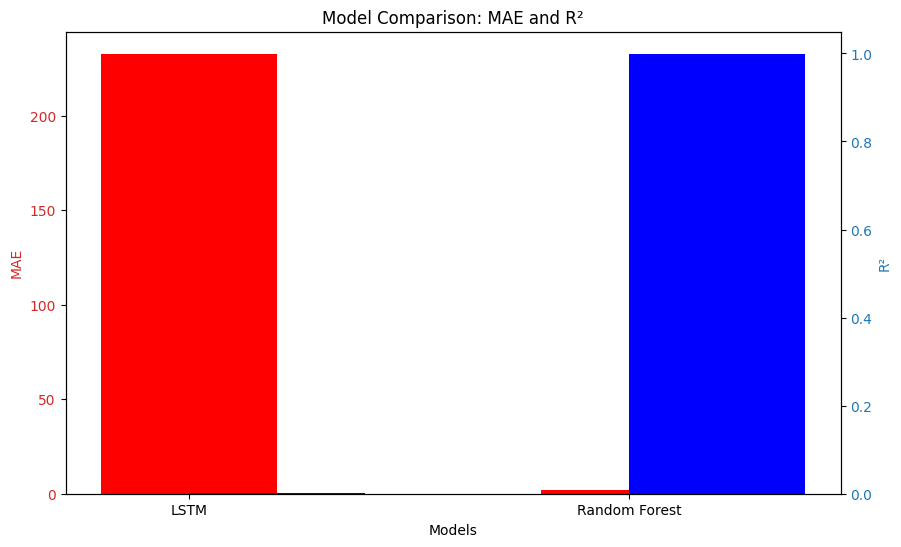

In [54]:
import numpy as np

# Combined bar chart for both MAE and R²
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE bar plot (left y-axis)
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE', color='tab:red')
ax1.bar(models, mae_values, color='red', width=0.4, align='center', label='MAE')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for R²
ax2 = ax1.twinx()
ax2.set_ylabel('R²', color='tab:blue')
ax2.bar(models, r2_values, color='blue', width=0.4, align='edge', label='R²')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Model Comparison: MAE and R²')
plt.show()


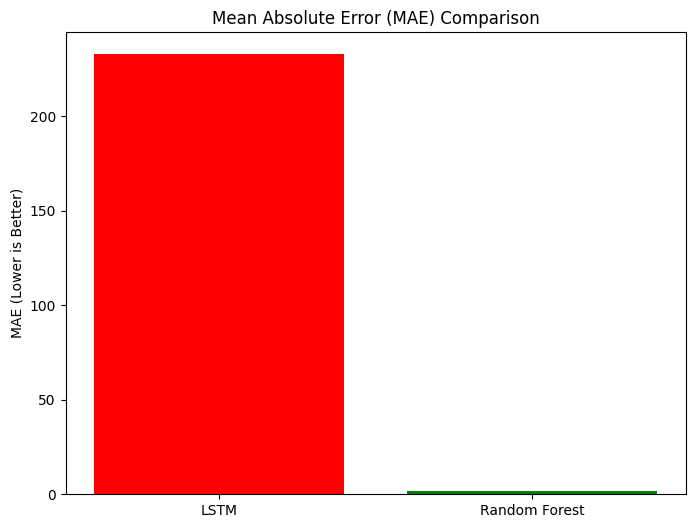

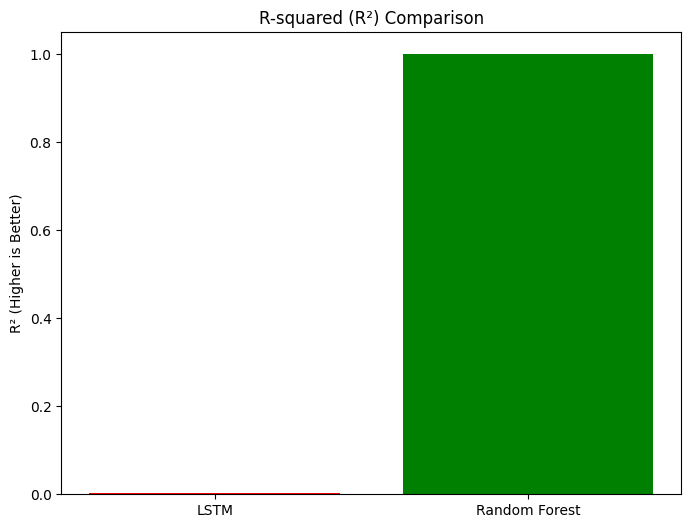

In [55]:
# Step 1: Plot MAE comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['red', 'green'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE (Lower is Better)')
plt.show()

# Step 2: Plot R² comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['red', 'green'])
plt.title('R-squared (R²) Comparison')
plt.ylabel('R² (Higher is Better)')
plt.show()
